In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
from latexify import latexify

Classification

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create an imbalanced dataset with two features
X, y = make_blobs(
    n_samples=[4500,500],
    n_features=2,  # Use only two features
    cluster_std=[4.0,4.0],
    random_state=42
)

print(len(y))
print(len(y[y==1]))
print(len(y[y==0]))

5000
500
4500


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Train set shape: (4000, 2) (4000,)
Test set shape: (1000, 2) (1000,)


Text(0.5, 1.0, 'Training Data')

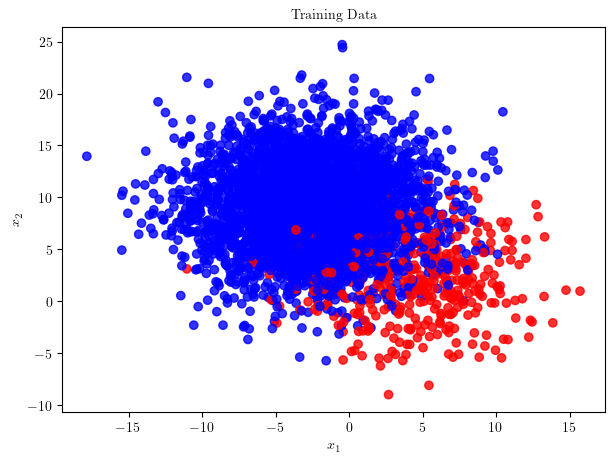

In [4]:
colors = ['blue' if label == 0 else 'red' for label in y_train]
latexify(fig_width=7, fig_height=5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, alpha=0.8)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Training Data')

In [5]:
print(len(y_train[y_train==1]))
print(len(y_train[y_train==0]))

393
3607


In [6]:
print(len(y_test[y_test==1]))
print(len(y_test[y_test==0]))

107
893


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy and F1 score
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.945
F1 Score: 0.7208121827411167


In [8]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy='stratified')
dummy_classifier.fit(X_train, y_train)

y_pred_dummy = dummy_classifier.predict(X_test)
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
f1_dummy = f1_score(y_test, y_pred_dummy)

# Print the accuracy and F1 score for the dummy classifier
print("Dummy Classifier Accuracy:", accuracy_dummy)
print("Dummy Classifier F1 Score:", f1_dummy)


Dummy Classifier Accuracy: 0.81
Dummy Classifier F1 Score: 0.07766990291262137


Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor

# Generate synthetic regression dataset with noise
np.random.seed(42)
X = np.linspace(0, 1, 500).reshape(-1, 1)
slope = 1.2
y_true = slope * X.squeeze()
y = y_true + np.random.normal(scale=0.5, size=len(X))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (400, 1) (400,)
Test set shape: (100, 1) (100,)


Text(0.5, 1.0, 'Training Data')

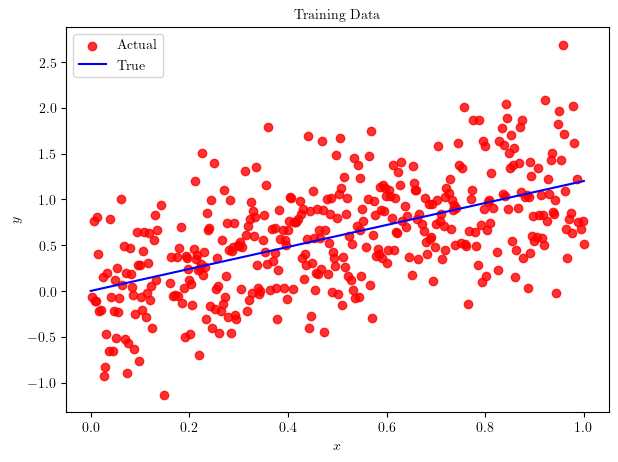

In [10]:
# Scatter plot of the training data
plt.scatter(X_train, y_train, color='red', alpha=0.8, label='Actual')
plt.plot(X, y_true, color='blue', label='True')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.title('Training Data')

In [13]:
# RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Print the Mean Squared Error for the RandomForestRegressor
print("Random Forest Regressor MSE:", mse_rf)

Random Forest Regressor MSE: 0.3446175878909235


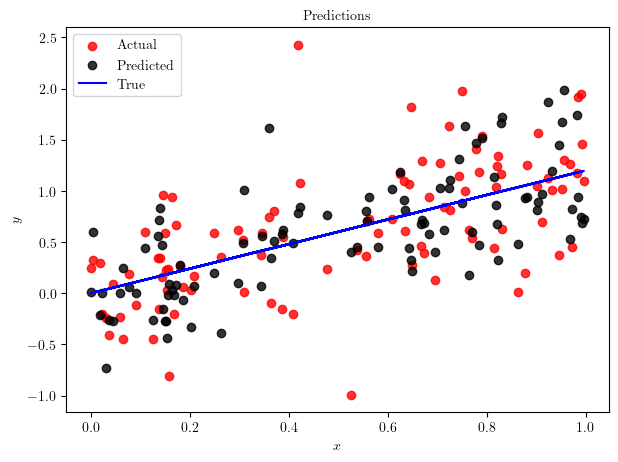

In [14]:
plt.scatter(X_test, y_test, color='red', alpha=0.8, label='Actual')
plt.scatter(X_test, y_pred_rf, color='black', alpha=0.8, label='Predicted')
plt.plot(X_test, slope*X_test.squeeze(), color='blue', label='True')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Predictions')
plt.legend()
plt.show()


In [15]:
# DummyRegressor
dummy_regressor = DummyRegressor(strategy='mean')
dummy_regressor.fit(X_train, y_train)

y_pred_dummy = dummy_regressor.predict(X_test)
mse_dummy = mean_squared_error(y_test, y_pred_dummy)

# Print the Mean Squared Error for the DummyRegressor
print("Dummy Regressor MSE:", mse_dummy)

Dummy Regressor MSE: 0.39550009552721027


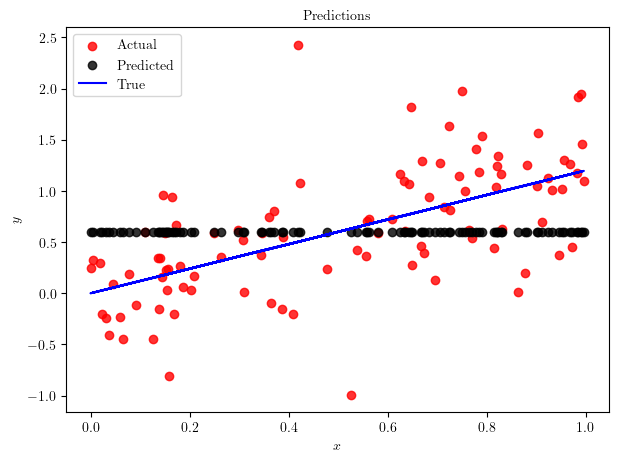

In [16]:
plt.scatter(X_test, y_test, color='red', alpha=0.8, label='Actual')
plt.scatter(X_test, y_pred_dummy, color='black', alpha=0.8, label='Predicted')
plt.plot(X_test, slope*X_test.squeeze(), color='blue', label='True')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Predictions')
plt.legend()
plt.show()